# Le pendule

Dans ce mini projet, nous allons nous pencher sur 3 cas différents, où nous étudierons le mouvement d'une pendule comme vous pouvez voir ci-dessous. Pour ce faire, nous utiliserons la méthode RK4 qui permet de résoudre numériquement des équations différentielles ordinaires (EDO). Elle permet de trouver une solution approchée à une EDO donnée en avançant pas à pas dans le temps.

!["Schema du Pendule"](SchemaPendule.png)

#### Methode de Runge-Kutta (explicite) d'ordre 4 (méthode RK4) (cours)
Nous nous limiterons au schéma d'intégration suivant, couramment  utilisé, basé sur une estimation de l'intégrale par la méthode de Simpson :

$$
    d_1 =   F\left(t_k   , u_{k} \right)          
$$

$$
    d_2 =   F\left(t_k + \frac{\Delta t}{2}  , u_{k} + \frac{\Delta t}{2} d_1 \right)
$$

$$
    d_3 =   F\left(t_k + \frac{\Delta t}{2}  , u_{k} + \frac{\Delta t}{2} d_2 \right) 
$$

$$
    d_4 =   F\left(t_k + \Delta t  , u_{k} + \Delta t d_3\right)            
$$

$$
    u_{k+1} =  u_k  +  \frac{\Delta t}{6} \left[ d_1+ 2 d_2  + 2 d_3 + d_4 \right]
$$

où l'erreur par pas est d'ordre $\Delta t^5$ et l'erreur cumulée est  d'ordre $\Delta t^4$.

## Approximation des petits angles

En premier, on considère le pendule simple de la figure ci-dessus, dont l'équation du mouvement libre s'écrit : 

$$ \frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\sin\theta=0 $$
et qui dans le cas des petits angles se simplifie :
$$\sin\theta\approx\theta\quad\Rightarrow\quad\frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\theta=0
$$

où $\theta$ est l'angle que fait le pendule par rapport à la verticale, $\Omega=\sqrt{{g/l}}$ est la pulsation propre et $q$ est le terme de frottement fluide. On utilisera par commodité la valeur suivante : $\Omega=1$ $\mathrm{rad\cdot s^{-1}}$. 

On va alors résoudre ($\frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\theta=0$) avec la méthode RK4 pour différentes valeurs de l'amortissement : $q=1$, $q=2$, $q=5\mathrm{~s^{-1}}$ et nous tracerons sur un même graphe l'évolution de $\theta(t)$ dans ces régimes respectivement pseudo-périodique, critique et apériodique.

On prendra comme conditions initiales $\theta(t=0)=10\mathrm{~°}$ (à convertir en radians) et $\frac{\mathrm{d}\theta}{\mathrm{d}t}(t=0)=0$ et un pas de temps $\mathrm{d}t=0.05\mathrm{~s}$ pour $t$ allant de $0$ à $20\mathrm{~s}$.

Nous savons que la dérivée première de $\theta$ par rapport au temps $t$, on peut utiliser la vitesse angulaire $\omega$. La vitesse angulaire est la dérivée de l'angle $\theta$ par rapport au temps, donc :

$$\frac{{d\theta}}{{dt}} = \omega$$

Cette équation est simplement une relation de base entre la vitesse angulaire $\omega$ et l'angle $\theta$. En utilisant cette relation, on peut directement utiliser $\omega$ comme dérivée première de $\theta$ dans la fonction $f(t, \theta, \omega, q)$ .

Pour obtenir la dérivée seconde de $\theta$ par rapport au temps, nous avons l'équation différentielle suivante :

$$\frac{{d^2\theta}}{{dt^2}} = - q \frac{{d\theta}}{{dt}} - \Omega^2 \theta$$

où $q$ est le terme de frottement fluide et $\Omega$ est la pulsation propre du pendule.

Cette équation représente l'accélération angulaire du pendule, qui est influencée par le frottement fluide et la force de rappel élastique (due à la gravité). En utilisant la relation $\frac{{d\theta}}{{dt}} = \omega$ que nous avons déjà établie pour la dérivée première, on peut réécrire l'équation comme suit :

$$\frac{{d^2\theta}}{{dt^2}} = - q \omega - \Omega^2 \theta$$

Cette équation est utilisée dans la fonction $f(t, \theta, \omega, q)$ pour calculer la dérivée seconde de $\theta$ par rapport au temps.

On met en place un code pour résoudre notre problème

In [60]:
# Importation des modules
import numpy as np
import matplotlib.pyplot as plt 

In [61]:
# Définition des constantes
Omega = 1  # rad/s
q_val = [1, 2, 5]  # Valeurs de l'amortissement
theta_0 = np.radians(10)  # Condition initiale en radians
w_0=0# Condition initiale de vitesse angulaire
dt = 0.05  # pas de temps
t_val = np.arange(0, 20 + dt, dt)  # Valeurs de temps de 0 à 20 s inclus

In [62]:
def f(t, theta, w, q):
    return w, -q * w - Omega**2 * theta

def rk4_step(t, theta, w, q, dt):
    k1_theta, k1_w = f(t, theta, w, q)
    k2_theta, k2_w = f(t + dt/2, theta + k1_theta*dt/2, w + k1_w*dt/2, q)
    k3_theta, k3_w = f(t + dt/2, theta + k2_theta*dt/2, w + k2_w*dt/2, q)
    k4_theta, k4_w = f(t + dt, theta + k3_theta*dt, w + k3_w*dt, q)
    
    Theta = theta + (k1_theta + 2*k2_theta + 2*k3_theta + k4_theta) * dt / 6
    W = w + (k1_w + 2*k2_w + 2*k3_w + k4_w) * dt / 6
    
    return Theta, W

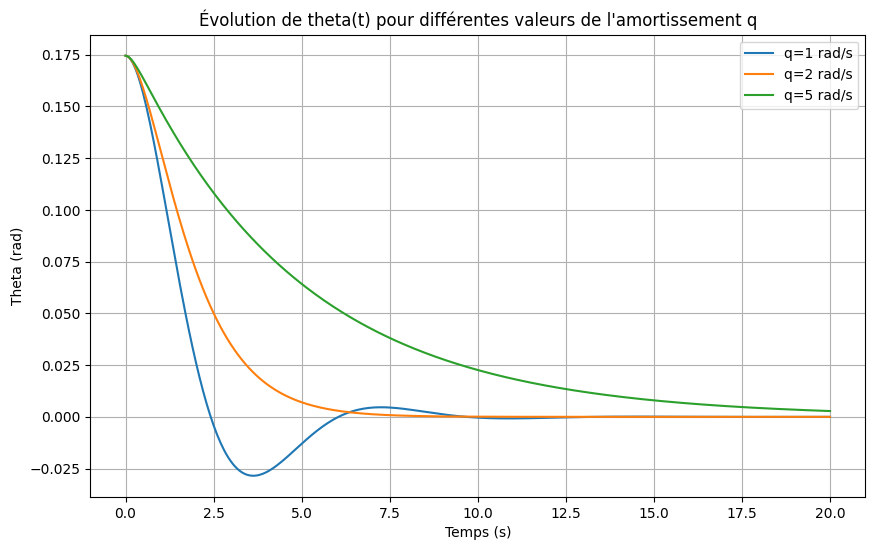

In [63]:
plt.figure(figsize=(10, 6))

# Résolution pour différentes valeurs de q
for q in q_val:
    theta_val = [theta_0]
    w_val = [w_0]
    for t in t_val[:-1]:
        theta, w = rk4_step(t, theta_val[-1], w_val[-1], q, dt)
        theta_val.append(theta)
        w_val.append(w)
    plt.plot(t_val, theta_val, label=f'q={q} rad/s')

plt.title("Évolution de theta(t) pour différentes valeurs de l'amortissement q")
plt.xlabel("Temps (s)")
plt.ylabel("Theta (rad)")
plt.legend()
plt.grid(True)
plt.show()


## Force d'excitation

Nous introduisons maintenant une force d'excitation dans le pendule, modifiant ainsi l'équation du mouvement comme suit :

$$ \frac{\mathrm{d}^2\theta}{\mathrm{d}t^2} + q\frac{\mathrm{d}\theta}{\mathrm{d}t} + \Omega^2\theta = F_e\sin(\Omega_e t). $$

Pour résoudre cette nouvelle équation, nous utiliserons la méthode RK4 avec une force excitatrice d'intensité $F_e=1\mathrm{~rad\cdot s^{-2}}$ et une pulsation $\Omega_e=\frac{2\Omega}{3}$.

Nous tracerons ensuite sur un même graphe les trajectoires dans l'espace des phases $\left(\theta,\frac{\mathrm{d}\theta}{\mathrm{d}t}\right)$ pour trois scénarios : le pendule libre ($q=0$ et $F_e=0$), le pendule amorti ($q=1$ et $F_e=0$), et le pendule amorti avec excitation ($q=1$ et $F_e=1$).

Les conditions initiales que nous utiliserons sont $\theta(t=0)=10\mathrm{~°}$ (que nous convertirons en radians) et $\frac{\mathrm{d}\theta}{\mathrm{d}t}(t=0)=0$.

Nous allons procéder à la réalisation de ces étapes.

In [64]:
# Définition des nouvelles constantes
q_val = [0, 1, 1]  # Valeurs de l'amortissement
Fe_val = [0, 0, 1]  # Valeurs de la force excitatrice
Omega_e = 2/3 * Omega  # Pulsation de la force excitatrice
theta_0 = np.radians(10)  # Condition initiale en radians
dt = 0.05  # pas de temps
t_val = np.arange(0, 20 + dt, dt)  # Valeurs de temps de 0 à 20 s inclus

In [65]:
def f(t, theta, w, q, Fe, Omega_e):
    return w, -q * w - Omega**2 * theta + Fe * np.sin(Omega_e * t)

def rk4_step(t, theta, w, q, Fe, Omega_e, dt):
    k1_theta, k1_w = f(t, theta, w, q, Fe, Omega_e)
    k2_theta, k2_w = f(t + dt/2, theta + k1_theta*dt/2, w + k1_w*dt/2, q, Fe, Omega_e)
    k3_theta, k3_w = f(t + dt/2, theta + k2_theta*dt/2, w + k2_w*dt/2, q, Fe, Omega_e)
    k4_theta, k4_w = f(t + dt, theta + k3_theta*dt, w + k3_w*dt, q, Fe, Omega_e)
    
    Theta = theta + (k1_theta + 2*k2_theta + 2*k3_theta + k4_theta) * dt / 6
    W = w + (k1_w + 2*k2_w + 2*k3_w + k4_w) * dt / 6
    
    return Theta, W

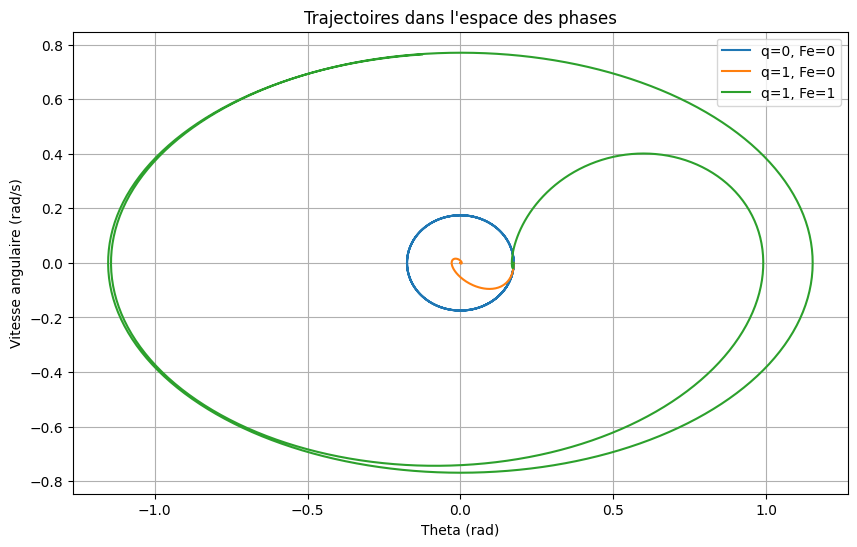

In [66]:
plt.figure(figsize=(10, 6))

# Résolution pour différentes valeurs de q et Fe
for q, Fe in zip(q_val, Fe_val):
    theta_val = [theta_0]
    w_val = [w_0]
    for t in t_val[:-1]:
        theta, w = rk4_step(t, theta_val[-1], w_val[-1], q, Fe, Omega_e, dt)
        theta_val.append(theta)
        w_val.append(w)
    plt.plot(theta_val, w_val, label=f'q={q}, Fe={Fe}')

plt.title("Trajectoires dans l'espace des phases")
plt.xlabel("Theta (rad)")
plt.ylabel("Vitesse angulaire (rad/s)")
plt.legend()
plt.grid(True)
plt.show()


En observant les trajectoires dans l'espace des phases pour différentes valeurs de l'amortissement `q` et de la force excitatrice `Fe`, voici ce que l'on peut remarquer :

1. Pendule libre (`q=0`, `Fe=0`):
   - La trajectoire dans l'espace des phases forme une ellipse régulière, sans déformation ni évolution significative au fil du temps. Cela correspond au comportement du pendule simple sans aucune force externe ou amortissement.
2. Pendule amorti (`q=1`, `Fe=0`):
   - La trajectoire dans l'espace des phases devient progressivement plus resserrée et décrit des spirales qui convergent vers le point d'origine. Cela indique que l'amortissement réduit progressivement l'amplitude des oscillations du pendule, ce qui le ramène finalement à sa position d'équilibre.
3. Pendule amorti avec excitation (`q=1`, `Fe=1`):
   - La trajectoire dans l'espace des phases montre une combinaison de mouvements oscillatoires et amortis, avec des variations périodiques dans l'amplitude et la forme de l'ellipse. La force d'excitation introduit des oscillations supplémentaires dans le système, ce qui modifie la dynamique du pendule amorti. On peut observer des phénomènes de résonance ou d'interaction entre l'amortissement et l'excitation, donnant lieu à des comportements complexes et non linéaires.

## Mouvement chaotique

Lorsque l'on ne fait plus l'hypothèse des petits angles ($\sin\theta\approx\theta$), on obtient une équation différentielle d'ordre 2 qui n'est pas linéaire :
$$ \frac{\mathrm{d}^2\theta}{\mathrm{d}t^2}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^2\sin\theta=F_e\sin(\Omega_e t) $$

Pour certaines valeurs des paramètres physiques, le comportement du pendule sera chaotique. Afin d'illustrer ce comportement, on se placera dans les conditions suivantes : $\theta(t=0)=10\mathrm{~°}$ (à convertir en radians) et $\frac{\mathrm{d}\theta}{\mathrm{d}t}(t=0)=0$, $\Omega_e=2\Omega/3$, $q=0.5\mathrm{~s^{-1}}$. 

On va résoudre l'équation du mouvement non-linéaire avec la méthode RK4 pour les valeurs suivantes de l'amplitude d'excitation : $F_e=\{1.4,1.44,1.465,1.5\}\mathrm{~rad\cdot s^{-2}}$.

Ensuite on tracera $\theta(t)$ sur un temps de $100\mathrm{~s}$.

De plus, il nous est demandé d'ajouter deux tests `if` dans la boucle après l'appel à rk4 pour maintenir l'angle $\theta$ dans l'intervalle $[-\pi;\pi]$.

In [79]:
# Définition des constantes
q = 0.5  # terme de frottement fluide
t_val = np.arange(0, 100 + dt, dt)  # Valeurs de temps de 0 à 100 s inclus
Fe_val = [1.4, 1.44, 1.465, 1.5]  # Amplitudes d'excitation

In [80]:
def f(t, theta, w, Fe, Omega_e):
    return w, -q * w - Omega**2 * np.sin(theta) + Fe * np.sin(Omega_e * t)

def rk4_step(t, theta, w, Fe, Omega_e, dt):
    k1_theta, k1_w = f(t, theta, w, Fe, Omega_e)
    k2_theta, k2_w = f(t + dt/2, theta + k1_theta*dt/2, w + k1_w*dt/2, Fe, Omega_e)
    k3_theta, k3_w = f(t + dt/2, theta + k2_theta*dt/2, w + k2_w*dt/2, Fe, Omega_e)
    k4_theta, k4_w = f(t + dt, theta + k3_theta*dt, w + k3_w*dt, Fe, Omega_e)
    
    Theta = theta + (k1_theta + 2*k2_theta + 2*k3_theta + k4_theta) * dt / 6
    W = w + (k1_w + 2*k2_w + 2*k3_w + k4_w) * dt / 6
    
    # Correction pour maintenir theta dans l'intervalle [-pi, pi]
    if Theta > np.pi:
        Theta -= 2 * np.pi
    elif Theta < -np.pi:
        Theta += 2 * np.pi
    
    return Theta, W


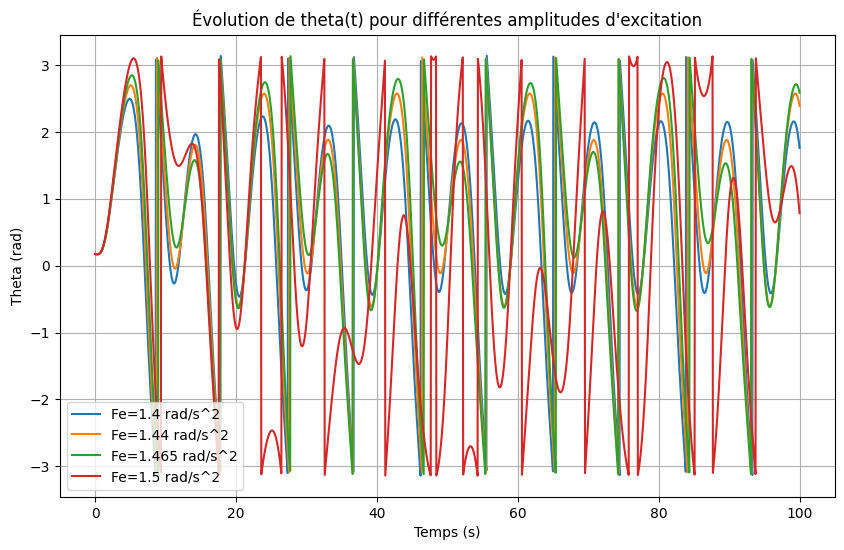

In [81]:
plt.figure(figsize=(10, 6))
# Résolution pour différentes valeurs de Fe
for Fe in Fe_val:
    theta_val = [theta_0]
    w_val = [w_0]
    for t in t_val[:-1]:
        theta, w = rk4_step(t, theta_val[-1], w_val[-1], Fe, Omega_e, dt)
        theta_val.append(theta)
        w_val.append(w)
    plt.plot(t_val, theta_val, label=f'Fe={Fe} rad/s^2')

plt.title("Évolution de theta(t) pour différentes amplitudes d'excitation")
plt.xlabel("Temps (s)")
plt.ylabel("Theta (rad)")
plt.legend()
plt.grid(True)
plt.show()

Lorsque nous observons le mouvement du pendule avec différentes amplitudes d'excitation, nous constatons que la période du pendule n'est pas constante. Pour des amplitudes d'excitation plus faibles, la période semble relativement constante et régulière. Cependant, lorsque l'amplitude d'excitation augmente, nous observons des variations significatives dans la période du pendule.

En particulier, pour des valeurs d'amplitude d'excitation proches de certaines valeurs critiques, le pendule peut présenter des comportements périodiques complexes ou même chaotiques. Ces comportements chaotiques se traduisent par des variations imprévisibles de la période du pendule, ce qui signifie que la période ne peut pas être caractérisée de manière simple et constante comme dans le cas d'un mouvement sinusoïdal régulier.

Dans le cas $F_e=1.5\mathrm{~rad\cdot s^{-2}}$, calculez l'évolution de $\theta(t)$ pour deux conditions initiales très proches l'une de l'autre : $\theta(t=0)=10\mathrm{~°}$ et $\theta(t=0)=9.999\mathrm{~°}$. Tracez la valeur absolue de la différence entre les deux solutions en fonctions du temps en échelle semi-logarithmique.

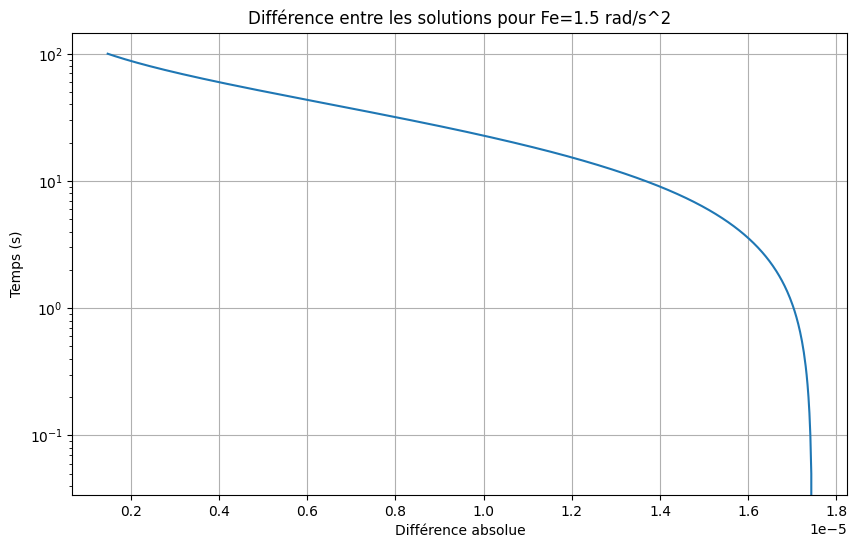

In [87]:
# Initialisation des conditions initiales
theta_0_1 = np.radians(10)
theta_0_2 = np.radians(9.999)

# Calcul des évolutions de theta(t) pour les deux conditions initiales
theta_values_1 = [theta_0_1]
theta_values_2 = [theta_0_2]

for t in t_val[:-1]:
    theta_1,_ = rk4_step(t, theta_values_1[-1], w_0, q, Omega_e, dt)
    theta_2,_= rk4_step(t, theta_values_2[-1], w_0, q, Omega_e, dt)
    theta_values_1.append(theta_1)
    theta_values_2.append(theta_2)

# Calcul de la différence entre les solutions
difference = np.abs(np.array(theta_values_1) - np.array(theta_values_2))

# Tracé de la valeur absolue de la différence en fonction du temps en échelle semi-logarithmique
plt.figure(figsize=(10, 6))
plt.semilogy(difference,t_val)
plt.title("Différence entre les solutions pour Fe=1.5 rad/s^2")
plt.xlabel("Différence absolue")
plt.ylabel("Temps (s)")
plt.grid(True)
plt.show()
